**Převod vektoru na rastr:**

In [2]:
library(raster)
dam<-raster("damaged.tif")

In [12]:
dam

class       : RasterLayer 
dimensions  : 683, 886, 605138  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 536955, 563535, 4681485, 4701975  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=38 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/kalab/gismentors/geopython-english/workshop/R/damaged.tif 
names       : damaged 
values      : 0, 1  (min, max)


In [15]:
dam[dam==0]<-NA

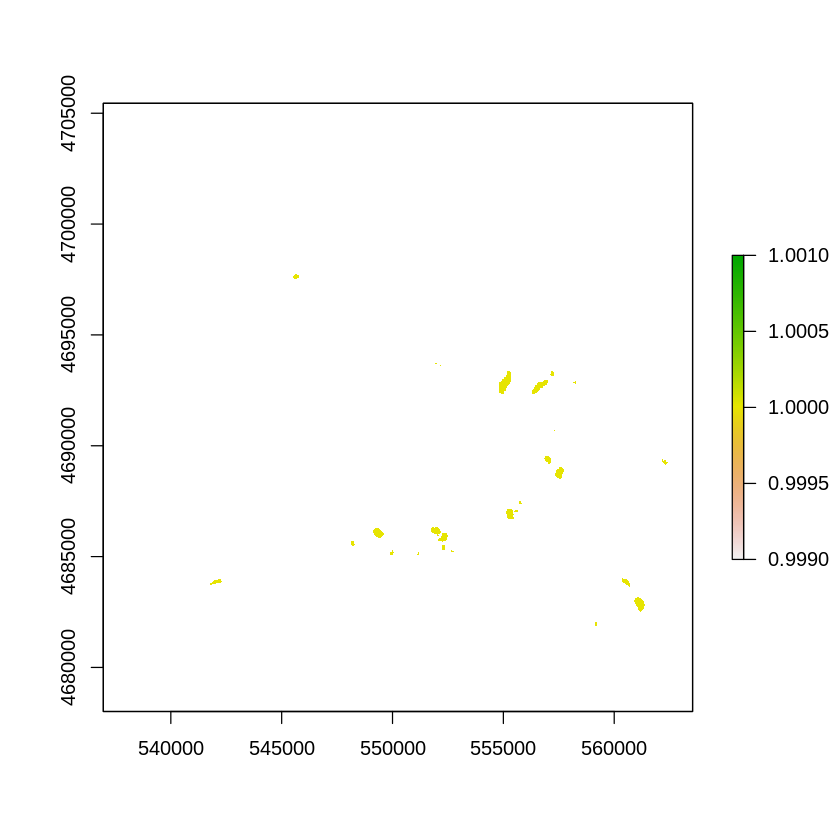

In [17]:
plot(dam)

Rastrová data lze převést na polygony pomocí `rasterToPolygons`. Funkce je ale pomalá, je třeba zohlednit velikost rastru a případné použití alternativy (viz https://johnbaumgartner.wordpress.com/2012/07/26/getting-rasters-into-shape-from-r/) 

In [19]:
poly <- rasterToPolygons(dam,dissolve = T)

Loading required namespace: rgeos


In [20]:
poly

class       : SpatialPolygonsDataFrame 
features    : 1 
extent      : 539235, 562395, 4681605, 4697745  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=38 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 1
names       : layer 
value       :     1 

In [21]:
library(rgdal)
writeOGR(poly,"dam.shp",layer = "dam.shp", driver = 'ESRI Shapefile')

**Převod rastru na vektor:**

In [22]:
library(rgdal)
chru<-readOGR("../../data/protected_areas-etrs.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/home/kalab/gismentors/geopython-english/data/protected_areas-etrs.shp", layer: "protected_areas-etrs"
with 5626 features
It has 14 fields
Integer64 fields read as strings:  OBJECTID KOD ZMENA_G ZMENA_T PREKRYV 


In [24]:
library(rgeos)
?gUnion

In [25]:
chru<-gUnion(chru, chru)

In [26]:
chru

class       : SpatialPolygons 
features    : 1 
extent      : 4493979, 4952711, 2839120, 3106267  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs 

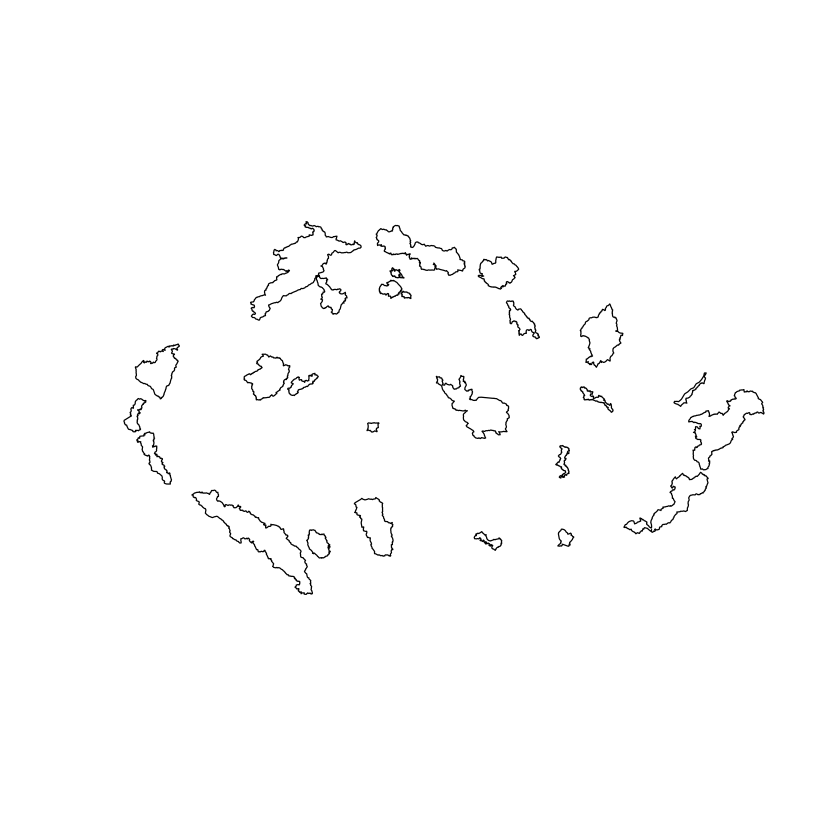

In [27]:
plot(chru)

In [36]:
chru@proj4string

CRS arguments:
 +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80
+units=m +no_defs 

class       : Extent 
xmin        : 4493979 
xmax        : 4952711 
ymin        : 2839120 
ymax        : 3106267 

Nejdříve je nutné vytvořit prázdný rastr

In [44]:
#rozliseni
r_res<-1000
#souradnicovy system, prevzaty z puvodni vrstvy
r_crs<-crs(chru)
#rozsah (extent), prevzaty z puvodni vrstvy
r_ext<-extent(chru)

In [45]:
empty_r<-raster(resolution=r_res,ext=r_ext,crs=r_crs)

In [46]:
empty_r

class       : RasterLayer 
dimensions  : 267, 459, 122553  (nrow, ncol, ncell)
resolution  : 1000, 1000  (x, y)
extent      : 4493979, 4952979, 2839267, 3106267  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs 


In [47]:
r_chru <- rasterize(chru, empty_r)

In [48]:
r_chru

class       : RasterLayer 
dimensions  : 267, 459, 122553  (nrow, ncol, ncell)
resolution  : 1000, 1000  (x, y)
extent      : 4493979, 4952979, 2839267, 3106267  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


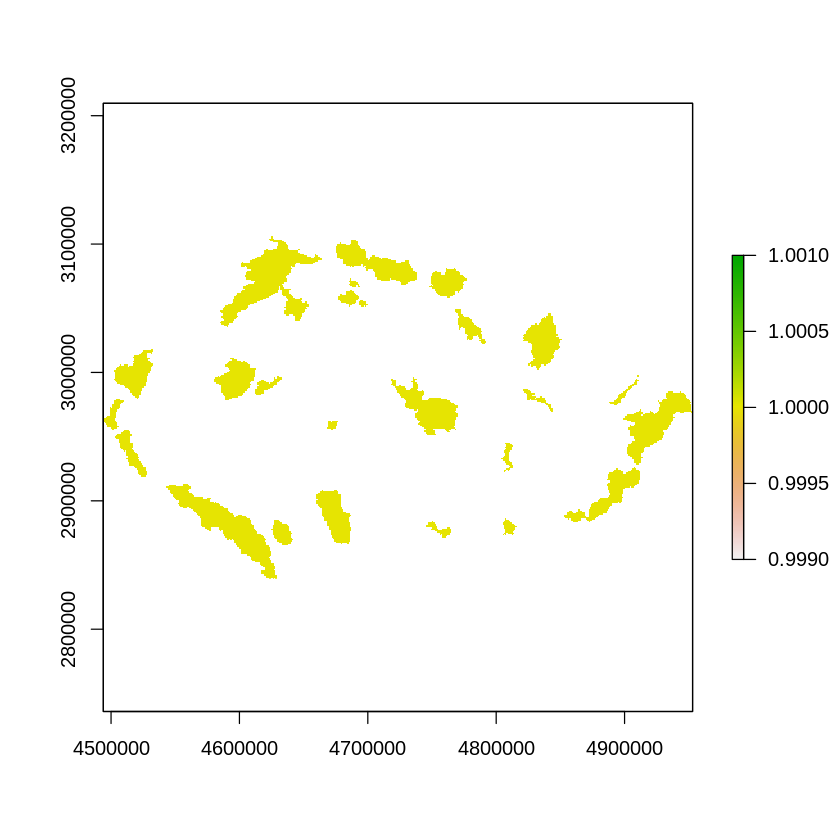

In [49]:
plot(r_chru)

In [50]:
writeRaster(r_chru,"r_chru.tif")